In [1]:
import numpy as np
import os
import os.path as path
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
import pandas as pd
import itertools as it
import pickle
import io

In [2]:
from importlib import reload
import util
from util import *
reload(util)
from util import *

# load_data

In [3]:
data_root = r'E:\Projects\TreasureHunter\data'
files = [f[:-4] for f in os.listdir(path.join(data_root, 'map'))]

In [4]:
samples = load_or_generate_samples_dict('samples_dict.pkl', data_root)

In [5]:
df = load_or_generate_df('df_with_matched.pkl', data_root, samples)

In [6]:
df

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std
0,X00016469612,X00016469619,"[63, 54, 17, 50, 23, 51, 62, 29, 31, 52, 12, 1...","[58, 61, 13, 50, 18, 52, 57, 25, 41, 59, 7, 10...",31,27,34,43,0.166634,0.115720,0.202874
1,X00016469612,X00016469620,"[45, 54, 26, 50, 23, 51, 47, 12, 16, 20, 33, 3...","[53, 66, 58, 74, 64, 60, 4, 16, 7, 73, 48, 51,...",20,16,22,22,0.315675,0.205239,0.376529
2,X00016469612,X00016469622,"[32, 54, 17, 26, 50, 23, 51, 28, 21, 52, 12, 1...","[29, 64, 9, 16, 50, 20, 51, 55, 19, 62, 6, 8, ...",25,21,27,29,0.154826,0.135502,0.205748
3,X00016469612,X00016469623,"[45, 54, 26, 50, 23, 51, 47, 12, 20, 33, 34, 3...","[60, 73, 65, 81, 71, 67, 4, 16, 80, 55, 58, 61...",19,15,20,22,0.320045,0.214769,0.385428
4,X00016469612,X00016469669,"[63, 32, 54, 17, 27, 26, 50, 23, 51, 62, 21, 5...","[42, 23, 35, 13, 16, 15, 30, 19, 32, 41, 17, 3...",29,25,32,30,0.122434,0.117931,0.169994
...,...,...,...,...,...,...,...,...,...,...,...
195620,X51008164998,X51009453801,"[69, 60, 26, 68, 25, 17, 48, 52, 58, 21, 44, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 7...",31,21,37,37,0.145418,0.143579,0.204356
195621,X51008164998,X51009453804,"[60, 6, 17, 52, 58, 21, 12, 7, 8, 19, 67, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",30,19,32,33,0.212901,0.134682,0.251924
195622,X51008164999,X51009453801,"[88, 79, 26, 87, 25, 17, 71, 67, 77, 21, 60, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 4...",31,21,45,37,0.159161,0.153446,0.221083
195623,X51008164999,X51009453804,"[79, 6, 17, 71, 77, 21, 12, 7, 8, 19, 86, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",31,20,38,34,0.228857,0.136812,0.266633


# check results

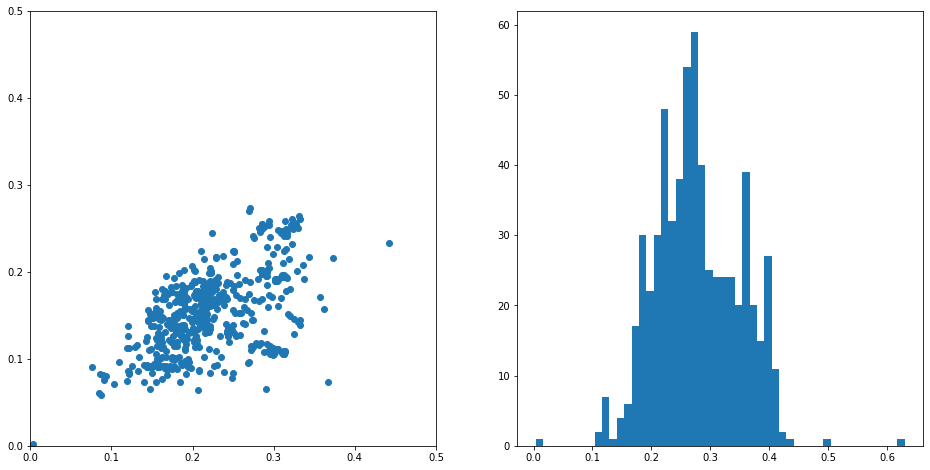

In [7]:
sp_fn = 'X51009453801'
df_sp = df[(df['sp1_idx']==sp_fn)|(df['sp2_idx']==sp_fn)]

f, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(df_sp['norm_diff_avg'], df_sp['norm_diff_std'])
axs[0].set_ylim(ymin=0, ymax=0.5)
axs[0].set_xlim(xmin=0, xmax=0.5)
hs = axs[1].hist(df_sp['norm_avg_std'], bins=50)

In [8]:
hs

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  1.,  4.,  6.,
        17., 30., 22., 30., 48., 32., 38., 54., 59., 40., 25., 24., 24.,
        24., 20., 39., 20., 15., 27., 11.,  2.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00358564, 0.01610102, 0.02861639, 0.04113177, 0.05364715,
        0.06616253, 0.07867791, 0.09119328, 0.10370866, 0.11622404,
        0.12873942, 0.14125479, 0.15377017, 0.16628555, 0.17880093,
        0.19131631, 0.20383168, 0.21634706, 0.22886244, 0.24137782,
        0.25389319, 0.26640857, 0.27892395, 0.29143933, 0.30395471,
        0.31647008, 0.32898546, 0.34150084, 0.35401622, 0.36653159,
        0.37904697, 0.39156235, 0.40407773, 0.41659311, 0.42910848,
        0.44162386, 0.45413924, 0.46665462, 0.47916999, 0.49168537,
        0.50420075, 0.51671613, 0.52923151, 0.54174688, 0.55426226,
        0.56677764, 0.57929302, 0.59180839, 0.60432377, 0.61683915,
        0.62935453]),
 <BarContainer

In [9]:
df_sp[df_sp['norm_avg_std']<1.15].sort_values('norm_avg_std')

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std
44098,X51005453801,X51009453801,"[63, 54, 44, 31, 29, 47, 26, 62, 11, 22, 23, 4...","[63, 54, 45, 32, 30, 48, 27, 62, 12, 23, 24, 4...",60,45,61,61,0.002894,0.002117,0.003586
125498,X51006350763,X51009453801,"[64, 55, 45, 25, 48, 27, 63, 12, 23, 24, 49, 3...","[63, 54, 45, 25, 48, 27, 62, 12, 23, 24, 49, 3...",59,43,59,59,0.084489,0.060623,0.103989
125123,X51006350750,X51009453801,"[64, 55, 45, 25, 48, 27, 63, 12, 23, 24, 49, 3...","[63, 54, 45, 25, 48, 27, 62, 12, 23, 24, 49, 3...",59,43,59,59,0.086668,0.058730,0.104693
174095,X51006857071,X51009453801,"[63, 54, 47, 32, 62, 18, 29, 48, 39, 22, 41, 4...","[63, 54, 48, 27, 62, 12, 24, 49, 37, 16, 39, 4...",46,32,47,48,0.090455,0.075685,0.117942
105098,X51005757286,X51009453801,"[52, 43, 36, 51, 22, 17, 41, 16, 20, 5, 19, 21...","[63, 54, 45, 62, 24, 16, 52, 20, 21, 4, 18, 22...",25,18,26,33,0.076571,0.090973,0.118908
...,...,...,...,...,...,...,...,...,...,...,...
52243,X51005577192,X51009453801,"[53, 55, 24, 49, 52, 21, 16, 45, 50, 19, 26, 5...","[54, 45, 25, 48, 27, 24, 16, 39, 43, 21, 51, 4...",28,19,30,33,0.332988,0.260727,0.422918
189737,X51007391372,X51009453801,"[65, 67, 24, 61, 64, 21, 16, 57, 62, 19, 26, 5...","[54, 45, 25, 48, 27, 24, 16, 39, 43, 21, 51, 4...",28,19,32,33,0.331735,0.264653,0.424369
120932,X51006329399,X51009453801,"[53, 55, 49, 52, 22, 43, 41, 50, 66, 17, 23, 6...","[54, 45, 48, 27, 24, 16, 39, 43, 52, 21, 51, 4...",27,17,36,29,0.373095,0.215752,0.430986
4970,X00016469676,X51009453801,"[38, 21, 49, 22, 13, 50, 12, 44, 27, 3, 28, 32...","[48, 20, 21, 51, 4, 14, 18, 22, 26, 31, 36, 40...",13,8,13,17,0.442097,0.233149,0.499808


avg norm: 0.08448916398398701, norm std: 0.06062340361233531, norm avg&std 0.10398853733107874


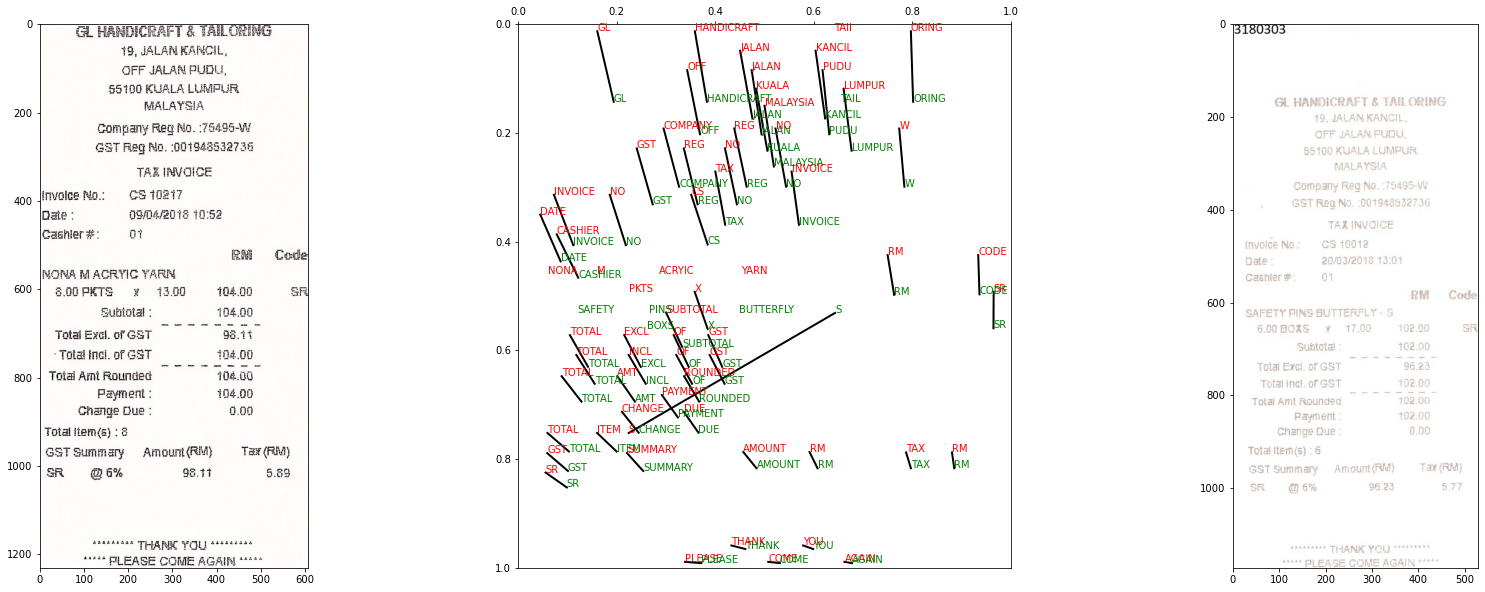

In [10]:
# show mapping
df_idx = 125498

sp1_idx, sp2_idx, sp1_matched, sp2_matched, n_matched, n_shared_kw, n_kw_occur_sp1, n_kw_occur_sp2, norm_diff_avg, norm_diff_std, norm_avg_std = df.loc[df_idx]
sp1, sp2 = samples[sp1_idx], samples[sp2_idx]
#sp1_matched, sp2_matched, n_shared_kw, n_kw_occur_sp1, n_kw_occur_sp2, norm_diff_avg, norm_diff_std = try_mapping_1(sp1, sp2)
print('avg norm: {}, norm std: {}, norm avg&std {}'.format(norm_diff_avg, norm_diff_std, norm_avg_std))
show_mapping(sp1, sp2, mapping=(sp1_matched, sp2_matched), imshow=True)

In [11]:
from importlib import reload
import util
from util import *
reload(util)
from util import *